<a href="https://colab.research.google.com/github/Putuani/UAS_BDDM_22.11.4875/blob/main/Klasifikasi_Data_Asuransi_Menggunakan_Agoritma_Random_Forest_dan_Gradient_Boosting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

In [2]:
data = pd.read_csv('/content/drive/MyDrive/UAS_BBDM7/dataset/Travel_Ansurance_Prediction.csv')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1987 entries, 0 to 1986
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Unnamed: 0           1987 non-null   int64 
 1   Age                  1987 non-null   int64 
 2   Employment Type      1987 non-null   object
 3   GraduateOrNot        1987 non-null   object
 4   AnnualIncome         1987 non-null   int64 
 5   FamilyMembers        1987 non-null   int64 
 6   ChronicDiseases      1987 non-null   int64 
 7   FrequentFlyer        1987 non-null   object
 8   EverTravelledAbroad  1987 non-null   object
 9   TravelInsurance      1987 non-null   int64 
dtypes: int64(6), object(4)
memory usage: 155.4+ KB


In [4]:
data.describe()

,Unnamed: 0,Age,AnnualIncome,FamilyMembers,ChronicDiseases,TravelInsurance
count,1987.000000,1987.000000,1.987000e+03,1987.000000,1987.000000,1987.000000
mean,993.000000,29.650226,9.327630e+05,4.752894,0.277806,0.357323
std,573.741812,2.913308,3.768557e+05,1.609650,0.448030,0.479332
min,0.000000,25.000000,3.000000e+05,2.000000,0.000000,0.000000
25%,496.500000,28.000000,6.000000e+05,4.000000,0.000000,0.000000
50%,993.000000,29.000000,9.000000e+05,5.000000,0.000000,0.000000
75%,1489.500000,32.000000,1.250000e+06,6.000000,1.000000,1.000000
max,1986.000000,35.000000,1.800000e+06,9.000000,1.000000,1.000000


# **EDA**

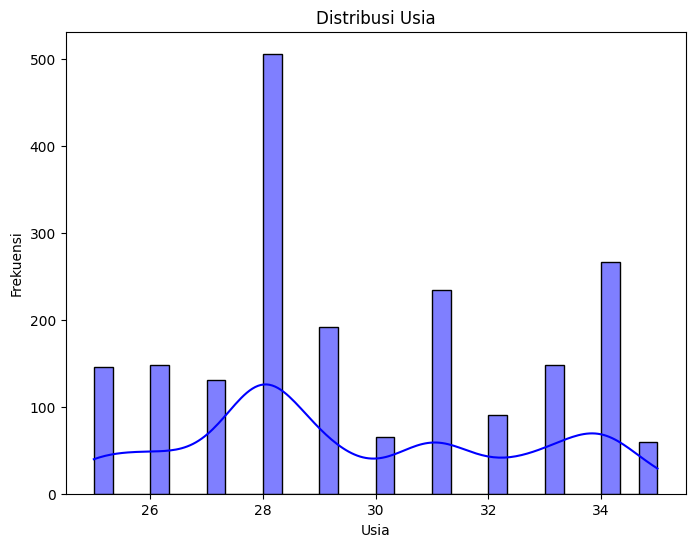

In [5]:
# Exploratory Data Analysis (EDA)
# 1. Melihat distribusi usia (Age) menggunakan histogram
plt.figure(figsize=(8, 6))
sns.histplot(data['Age'], kde=True, bins=30, color='blue')
plt.title('Distribusi Usia')
plt.xlabel('Usia')
plt.ylabel('Frekuensi')
plt.show()

<ipython-input-7-dfffb8dde9f6>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x='FrequentFlyer', palette='Set2')


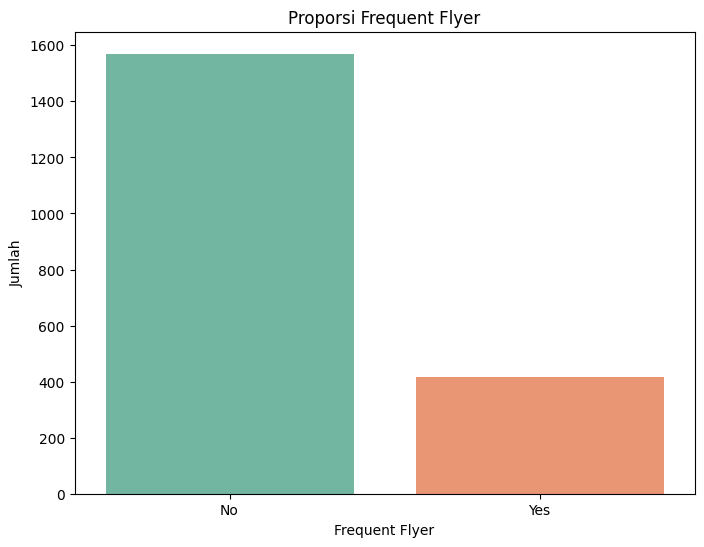

In [7]:
# 3. Proporsi Frequent Flyer (FrequentFlyer) menggunakan bar chart
plt.figure(figsize=(8, 6))
sns.countplot(data=data, x='FrequentFlyer', palette='Set2')
plt.title('Proporsi Frequent Flyer')
plt.xlabel('Frequent Flyer')
plt.ylabel('Jumlah')
plt.show()

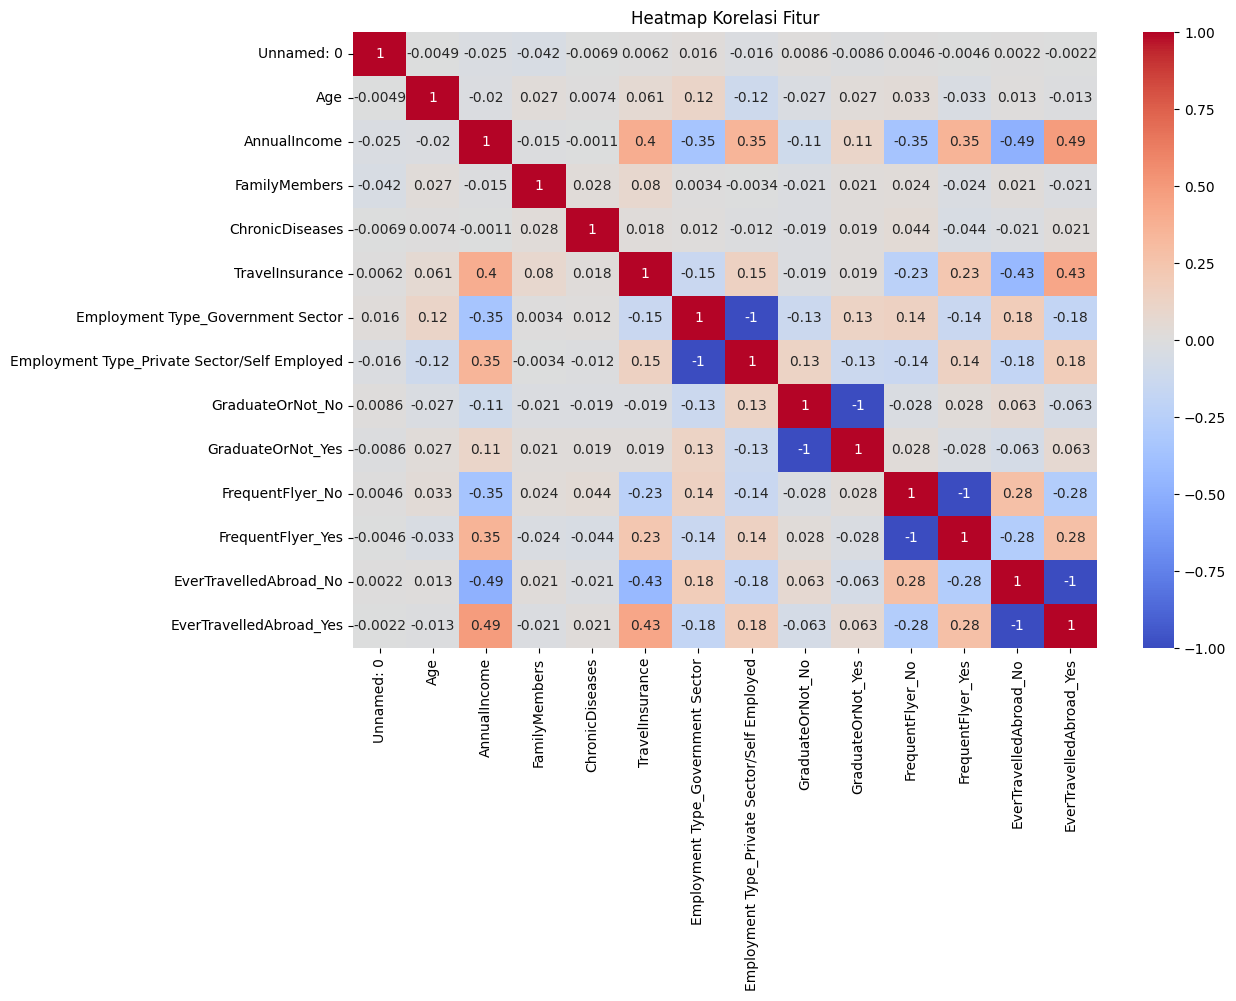

In [9]:
# Convert categorical features to numerical using one-hot encoding
categorical_features = ['Employment Type', 'GraduateOrNot', 'FrequentFlyer', 'EverTravelledAbroad']
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore') # sparse=False for compatibility with corr()
encoded_data = encoder.fit_transform(data[categorical_features])
encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(categorical_features))

# Concatenate encoded features with original DataFrame
numerical_data = data.drop(columns=categorical_features)
data_encoded = pd.concat([numerical_data, encoded_df], axis=1)

# Now calculate the correlation matrix and plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(data_encoded.corr(), annot=True, cmap='coolwarm')
plt.title('Heatmap Korelasi Fitur')
plt.show()

# **Preprosesing**

In [10]:
# Preprosesing
# Mengatasi missing values
data = data.dropna()

In [11]:
# Mengonversi fitur kategorikal menjadi numerikal menggunakan one-hot encoding
categorical_columns = data.select_dtypes(include=['object']).columns
data = pd.get_dummies(data, columns=categorical_columns, drop_first=True)


In [12]:
# Memisahkan fitur (X) dan target (y)
X = data.drop('TravelInsurance', axis=1)
y = data['TravelInsurance']

In [13]:
# Normalisasi menggunakan MinMaxScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:
# 4. Membuat model Random Forest
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
rf_predictions = rf_model.predict(X_test)

In [16]:
# Evaluasi model
print("Random Forest Classifier:")
print(classification_report(y_test, rf_predictions))
print("Accuracy:", accuracy_score(y_test, rf_predictions))

Random Forest Classifier:
              precision    recall  f1-score   support

           0       0.82      0.93      0.87       257
           1       0.82      0.62      0.71       141

    accuracy                           0.82       398
   macro avg       0.82      0.78      0.79       398
weighted avg       0.82      0.82      0.81       398

Accuracy: 0.8190954773869347


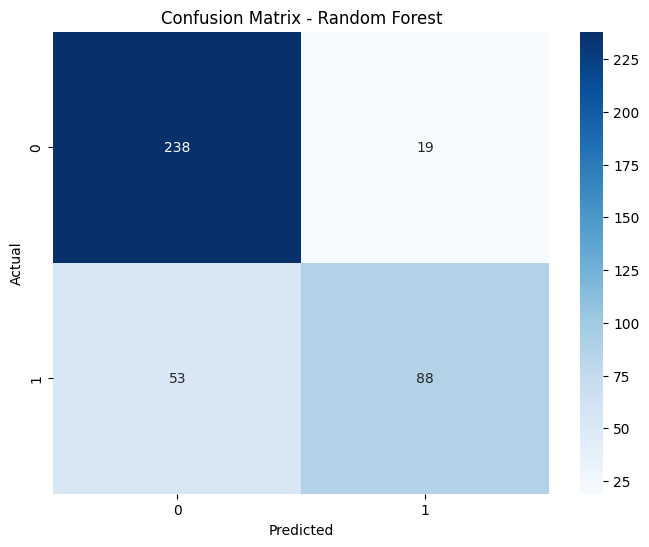

In [17]:
# Visualisasi Confusion Matrix Random Forest
cm_rf = confusion_matrix(y_test, rf_predictions)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues', xticklabels=set(y_test), yticklabels=set(y_test))
plt.title('Confusion Matrix - Random Forest')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [18]:
# Model Gradient Boosting
gb_model = GradientBoostingClassifier(n_estimators=100, random_state=42)
gb_model.fit(X_train, y_train)
gb_predictions = gb_model.predict(X_test)

In [19]:
# Evaluasi model
print("\nGradient Boosting Classifier:")
print(classification_report(y_test, gb_predictions))
print("Accuracy:", accuracy_score(y_test, gb_predictions))



Gradient Boosting Classifier:
              precision    recall  f1-score   support

           0       0.81      0.99      0.89       257
           1       0.98      0.57      0.72       141

    accuracy                           0.84       398
   macro avg       0.89      0.78      0.80       398
weighted avg       0.87      0.84      0.83       398

Accuracy: 0.8417085427135679


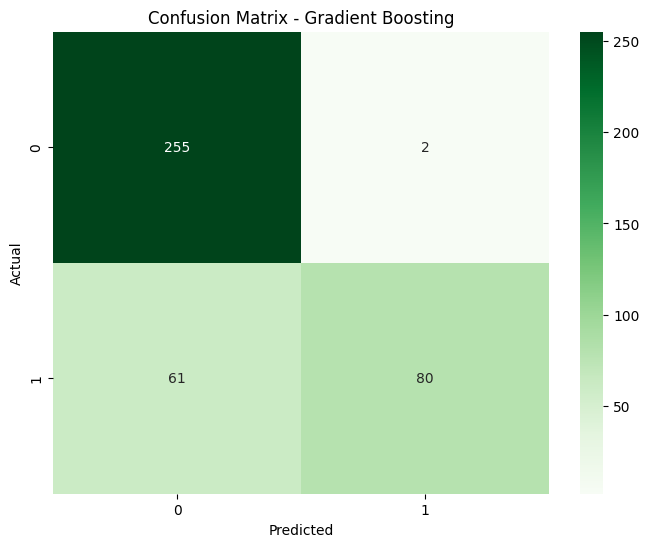

In [20]:
# Visualisasi Confusion Matrix Gradient Boosting
cm_gb = confusion_matrix(y_test, gb_predictions)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_gb, annot=True, fmt='d', cmap='Greens', xticklabels=set(y_test), yticklabels=set(y_test))
plt.title('Confusion Matrix - Gradient Boosting')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

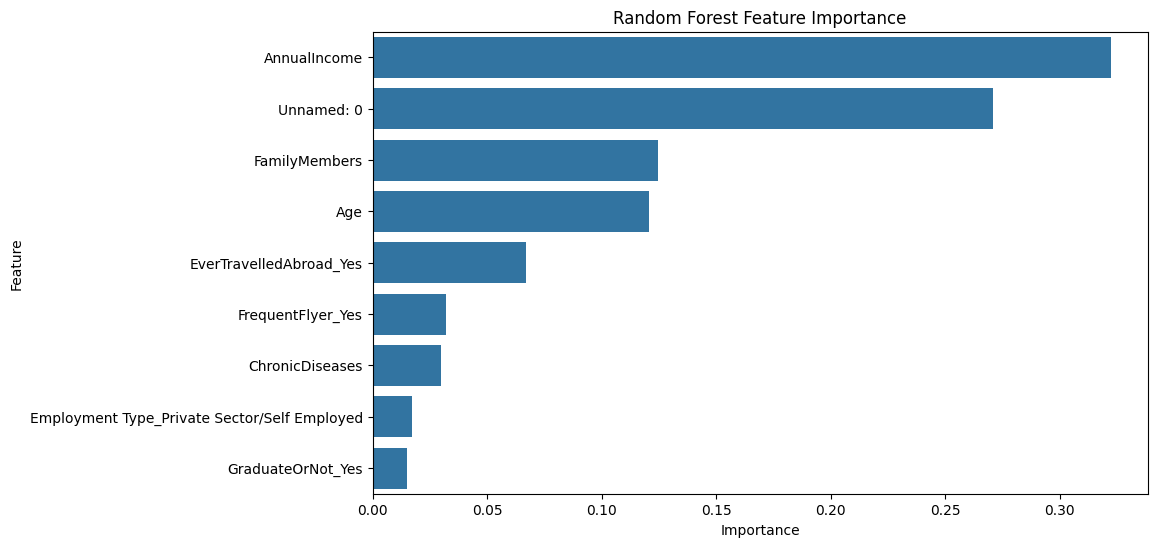

In [21]:
# 6. Visualisasi pentingnya fitur (Feature Importance)
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance)
plt.title('Random Forest Feature Importance')
plt.show()